<a href="https://colab.research.google.com/github/BMac23/Mat421/blob/main/Section_17_4_and_17_5_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lagrange Interpolation

Lagrange Interpolation finds a single polynomial that fits through all of the functions. This works by creating them as a combination of Lagrange basis polynomials $P_i(x)=∏^n_{j=1,j≠i}\frac{x−x_j}{x_i−x_j}$ and the final function is $L(x)=∑^n_{i=1}y_iP_i(x)$

So if we compute the polynomials from the equations, we find that the $P_i(x)$ has a property of $P_i(x_j) = 1$ when $i=j$ and $P_i(x_j)=0$ when $i \neq j$

In [7]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

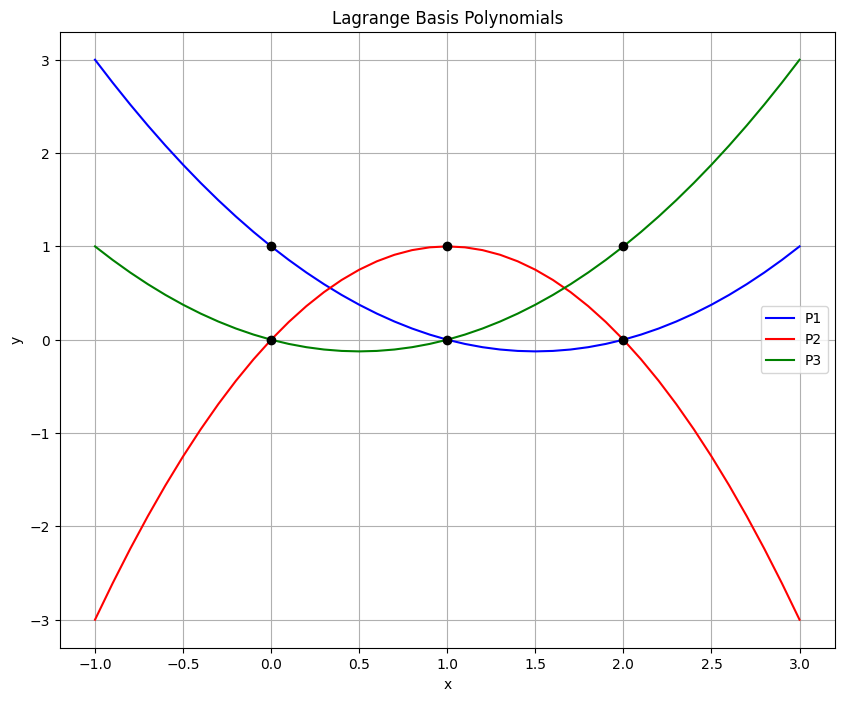

In [8]:
x = [0, 1, 2]
y = [1, 2, 5]

P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

Calculating manually, we find the inidivdual functions for the Lagrange Polynomial. So now lets try to combine it.

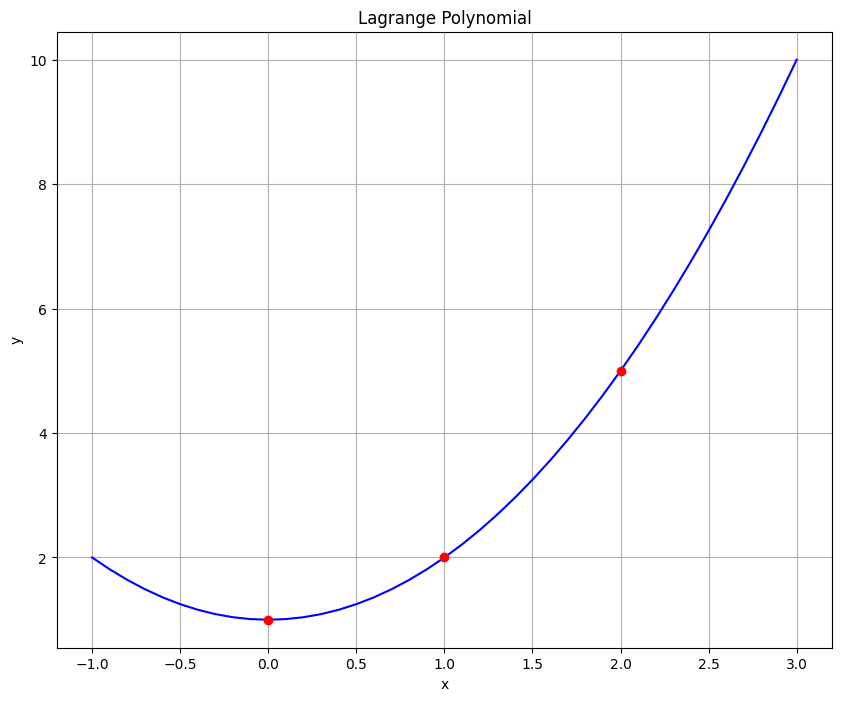

In [10]:
L = P1 + 2*P2 + 5*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We see that it all fits together nicely. This took a while to solve and code so luckily there's a built in Lagrange interpolation function with scipy

In [5]:
from scipy.interpolate import lagrange

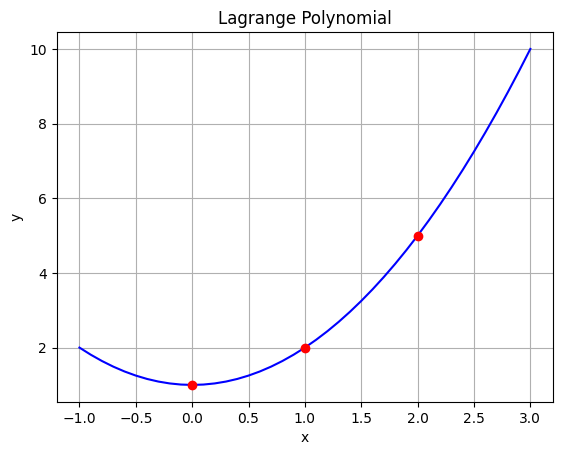

In [6]:
x = [0, 1, 2]
y = [1, 2, 5]
f = lagrange(x, y)


x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure()
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

To create my own Lagrange function, it would looks omething like this:

In [11]:
def my_lagrange(x, y, X):
    def lagrange_basis(xi, xj, x):
        product = 1
        for xj_elem in xj:
            if xj_elem != xi:
                product *= (x - xj_elem) / (xi - xj_elem)
        return product

    Y = []
    for x_val in X:
        Lx = 0
        for xi, yi in zip(x, y):
            Lx += yi * lagrange_basis(xi, x, x_val)
        Y.append(Lx)
    return Y

print(my_lagrange(x, y, [0.5, 1.5]))

[1.25, 3.25]


# Newton's Interpolation

Newton's polynomial interoplation is another popular way of doing this and can be quite nice to use as it has a much simpler form of:
$f(x)=∑_{i=0}^na_in_i(x)$ where $n_i(x)=∏^{i−1}_{j=0}(x−x_j)$

This is often expressed as an equation of:
$f(x)=a_0+a_1(x−x_0)+a_2(x−x_0)(x−x_1)+⋯+a_n(x−x_0)(x−x_1)…(x−x_n)$

The nice thing about this version is that the coeficcients of $a_i$ are simpler to determine as it becomes a simple pattern of "divided differences" expressed as:

$f[x_k,x_k−1,…,x_1,x_0]=\frac{f[x_k,x_{k−1},…,x_2,x_2]−f[x_{k−1},x_{k−2},…,x_1,x_0]}{x_k−x_0}$

In [12]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

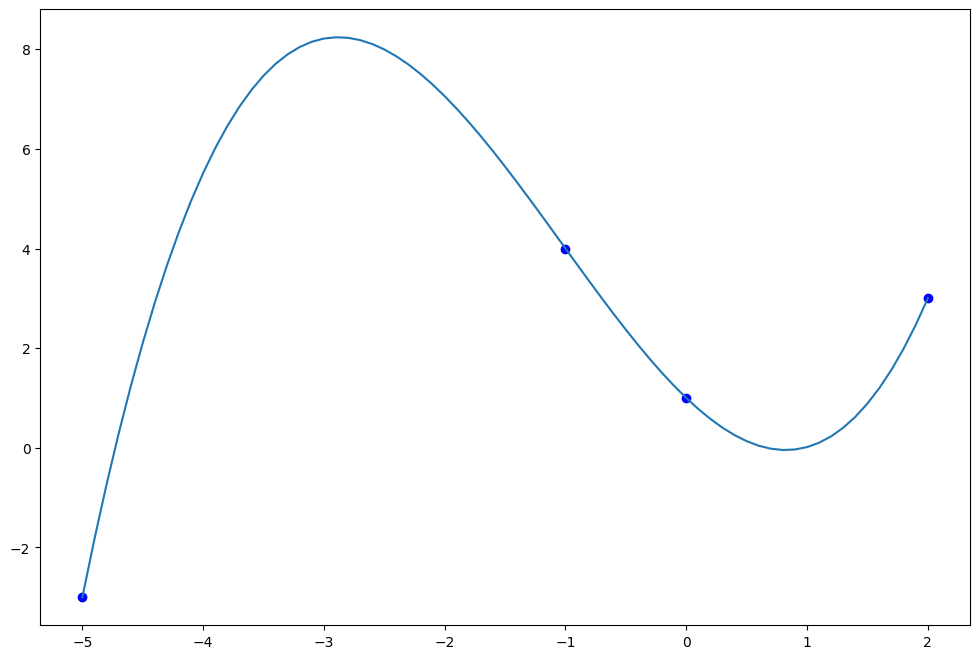

In [14]:
x = np.array([-5, -1, 0, 2])
y = np.array([-3, 4, 1, 3])
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

Newtonian interpolation is also quite nice at fitting all of the data points cleanly and the method of interpolation you choose is largely up to personal preference